In [4]:
import torch
from torchvision import datasets, transforms
torch.cuda.is_available()
from PIL import Image

/data/jong980812/anaconda3/envs/asd/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import util.model_rpp
model=util.model_rpp.efficientnet_b1_rpp(pretrained=True, cut_at_pooling=False,
                    num_features=256, norm=False, dropout=0.5, num_classes=2, 
                    FCN=True, T=1., dim=256)

/data/jong980812/project/mae/util/model_rpp.py:234: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(self.local_conv.weight, mode= 'fan_out')
/data/jong980812/project/mae/util/model_rpp.py:237: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(self.feat_bn2d.weight,1) #initialize BN, may not be used
/data/jong980812/project/mae/util/model_rpp.py:238: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(self.feat_bn2d.bias,0) # iniitialize BN, may not be used
/data/jong980812/project/mae/util/model_rpp.py:242: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(self.instance0.weight, std=0.001)
/data/jong980812/project/mae/util/model_rpp.py:243: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(self.instance0.bias, 0)
/data/jong980812/project/mae/util/model_

In [16]:

finetune_path='/data/jong980812/project/mae/result_new/efficient_b1/only_pcb/bs2_lr2_909/final/OUT/07/checkpoint-7.pth'
checkpoint=torch.load(finetune_path,map_location='cpu')
model.load_state_dict(checkpoint['model'],strict=False)
model=model.to('cuda')

In [17]:
img_path='/local_datasets/asd/compact_crop_trimmed_2/07/val/ASD/A14-001-001.jpg'
transform=transforms.Compose([
                transforms.Resize((384,128)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.96, 0.96, 0.96],
                                        std=[0.1, 0.1, 0.1])
                ])
sample=Image.open(img_path)#pillow객체
sample=transform(sample)
sample=sample.to('cuda')



In [18]:
_,_,local_mask=model(sample.unsqueeze(0))

In [25]:
mask_0=local_mask[0][0]
topil=transforms.ToPILImage()
# mask_0_pil=topil(mask_0)
resize = transforms.Resize((384,128))
mask_0_resized = resize(mask_0.unsqueeze(0))
topil(mask_0_resized)

mask_1=local_mask[0][1]
topil=transforms.ToPILImage()
# mask_0_pil=topil(mask_0)
resize = transforms.Resize((384,128))
mask_1_resized = resize(mask_1.unsqueeze(0))
topil(mask_1_resized)

mask_2=local_mask[0][2]
topil=transforms.ToPILImage()
# mask_0_pil=topil(mask_0)
resize = transforms.Resize((384,128))
mask_2_resized = resize(mask_2.unsqueeze(0))
topil(mask_2_resized)
print(mask_2_resized.shape)


torch.Size([1, 384, 128])


In [20]:
transform_2=transforms.Compose([
                transforms.Resize((384,128)),
                transforms.ToTensor()])
sample_2=Image.open(img_path)#pillow객체
sample_2=transform_2(sample_2)

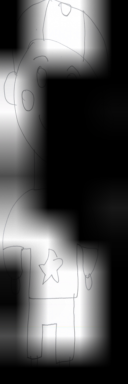

In [21]:
topil(sample_2*mask_0_resized.detach().cpu())

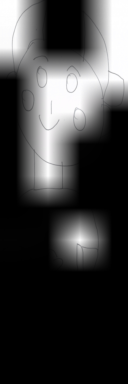

In [22]:
topil(sample_2*mask_1_resized.detach().cpu())

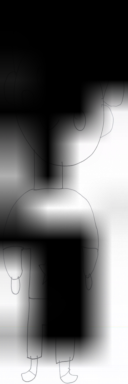

In [23]:
topil(sample_2*mask_2_resized.detach().cpu())

In [24]:
mask_0

tensor([[1.9149e-38, 1.0000e+00, 1.0000e+00, 2.9167e-18],
        [3.8472e-03, 1.0000e+00, 1.0000e+00, 0.0000e+00],
        [9.0405e-01, 4.1010e-16, 4.7466e-17, 6.5874e-21],
        [9.9606e-01, 3.3359e-26, 4.4796e-29, 3.2586e-02],
        [6.2636e-01, 1.4088e-35, 4.3455e-28, 7.7508e-06],
        [3.0668e-01, 5.9051e-36, 1.1787e-30, 1.9971e-03],
        [6.6753e-01, 1.8928e-06, 4.2158e-07, 9.2249e-02],
        [9.8379e-01, 9.9259e-01, 6.0130e-05, 2.0934e-02],
        [6.4457e-02, 1.0000e+00, 1.0000e+00, 8.8078e-04],
        [1.7823e-02, 9.9077e-01, 9.9998e-01, 5.9170e-09],
        [3.0392e-01, 1.0000e+00, 1.0000e+00, 1.2135e-19],
        [7.2065e-06, 5.0673e-04, 1.1387e-09, 4.0854e-38]], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [15]:
img_path_='/local_datasets/tu_berlin/01/train/ant/243.png'
sample=Image.open(img_path_)
transform=transforms.ToTensor()
transform(sample).shape


FileNotFoundError: [Errno 2] No such file or directory: '/local_datasets/tu_berlin/01/train/ant/243.png'

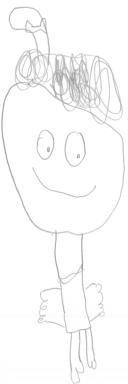

In [40]:
img_path='/local_datasets/asd/compact_crop_trimmed_2/05/val/ASD/A11-002-002.jpg'
transform=transforms.Compose([
                transforms.Resize((384,128)),
                transforms.Grayscale(1),
                transforms.ToTensor(),
                # transforms.Normalize(mean=[0.96],
                #                         std=[0.1])
                ])
sample=Image.open(img_path)#pillow객체
sample=transform(sample)
topil=transforms.ToPILImage()
topil(sample)

